In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/news_1.csv'

df  = pd.read_csv(file_path, delimiter='|')

df.tail()

,DateTime,BarPeriod,Candle_OpenPrice,Candle_HighPrice,Candle_LowPrice,Candle_ClosePrice,Candle_LastTradePrice,Candle_VolumeofTrades,Candle_BidVolumeOfTrades,Candle_AskVolumeOfTrades,...,VAP_AskVolumes,VAP_BidVolumes,VAP_NumberOfTrades,VAP_TotalVolume,zigzag,zigzag_text,ha_open,ha_high,ha_low,ha_close
1421818,2024-01-11 10:35:00.000,2024-01-11 10:35:59.582,4799.00,4800.50,4799.00,4800.00,4800.25,1596,628,968,...,"45,116,114,213,302,155,23,","4,162,68,122,201,71,0,","42,226,125,251,329,176,17,",15,4799.08,0,4798.03,4800.50,4798.03,4799.62
1421819,2024-01-11 10:36:00.000,2024-01-11 10:36:59.563,4800.25,4800.25,4798.75,4799.75,4799.75,1645,828,817,...,"26,40,236,300,93,106,16,","66,51,229,276,77,129,0,","69,72,364,391,146,164,14,",16,4800.25,1,4798.82,4800.25,4798.75,4799.75
1421820,2024-01-11 10:37:00.000,2024-01-11 10:37:59.502,4799.75,4800.25,4799.50,4799.75,4799.75,951,531,420,...,"19,136,213,52,","36,276,200,19,","48,310,342,62,",95,4800.25,1,4799.29,4800.25,4799.29,4799.81
1421821,2024-01-11 10:38:00.000,2024-01-11 10:38:59.501,4799.75,4801.00,4799.75,4800.50,4800.00,1253,562,691,...,"31,46,222,239,98,55,","76,80,201,57,148,0,","82,110,279,157,161,44,",12,4801.00,2,4799.55,4801.00,4799.55,4800.25
1421822,2024-01-11 10:39:00.000,2024-01-11 10:39:59.503,4800.50,4801.00,4799.75,4800.25,4800.25,957,458,499,...,"0,137,161,155,27,19,","15,131,185,94,33,0,","13,187,259,183,40,12,",95,4801.00,2,4799.90,4801.00,4799.75,4800.37


In [ ]:
def remove_milliseconds(datetime_str):
    return datetime_str[:-4]

df['DateTime'] = df['DateTime'].apply(remove_milliseconds)

In [ ]:
start_date = '2023-09-11 10:35:00.000'
end_date = '2024-01-11 10:35:00.000'
df= df[(df['DateTime'] >= start_date) & (df['DateTime'] <= end_date)]

In [ ]:
news_data='/content/drive/MyDrive/ForexFactory.csv'
news=pd.read_csv(news_data)
news.tail()

,Data,Time,currency,impact,event
23240,2024 Mon Dec 30,05:30PM,CNY,Medium,Non-Manufacturing PMI
23241,2024 Tue Dec 31,All Day,EUR,Non-Economic,German Bank Holiday
23242,2024 Tue Dec 31,06:00AM,USD,Medium,S&P/CS Composite-20 HPI y/y
23243,2024 Tue Dec 31,06:00AM,USD,Low,HPI m/m
23244,2024 Tue Dec 31,07:00AM,USD,High,CB Consumer Confidence


In [ ]:
news2=news.loc[(news['impact'] == 'High') & (news['currency'] == 'USD')]
news2

,Data,Time,currency,impact,event
39,2020 Fri Jan 03,07:00AM,USD,High,ISM Manufacturing PMI
47,2020 Fri Jan 03,11:00AM,USD,High,FOMC Meeting Minutes
82,2020 Tue Jan 07,07:00AM,USD,High,ISM Services PMI
92,2020 Wed Jan 08,05:15AM,USD,High,ADP Non-Farm Employment Change
95,2020 Wed Jan 08,08:26AM,USD,High,President Trump Speaks
...,...,...,...,...,...
23152,2024 Thu Dec 19,05:30AM,USD,High,Unemployment Claims
23171,2024 Fri Dec 20,05:30AM,USD,High,Core PCE Price Index m/m
23174,2024 Fri Dec 20,07:00AM,USD,High,Revised UoM Consumer Sentiment
23213,2024 Thu Dec 26,05:30AM,USD,High,Unemployment Claims


In [ ]:
news2['date'] = news2['Data'] + " " + news2['Time']
news2

<ipython-input-9-0f5bbf79f8b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news2['date'] = news2['Data'] + " " + news2['Time']


,Data,Time,currency,impact,event,date
39,2020 Fri Jan 03,07:00AM,USD,High,ISM Manufacturing PMI,2020 Fri Jan 03 07:00AM
47,2020 Fri Jan 03,11:00AM,USD,High,FOMC Meeting Minutes,2020 Fri Jan 03 11:00AM
82,2020 Tue Jan 07,07:00AM,USD,High,ISM Services PMI,2020 Tue Jan 07 07:00AM
92,2020 Wed Jan 08,05:15AM,USD,High,ADP Non-Farm Employment Change,2020 Wed Jan 08 05:15AM
95,2020 Wed Jan 08,08:26AM,USD,High,President Trump Speaks,2020 Wed Jan 08 08:26AM
...,...,...,...,...,...,...
23152,2024 Thu Dec 19,05:30AM,USD,High,Unemployment Claims,2024 Thu Dec 19 05:30AM
23171,2024 Fri Dec 20,05:30AM,USD,High,Core PCE Price Index m/m,2024 Fri Dec 20 05:30AM
23174,2024 Fri Dec 20,07:00AM,USD,High,Revised UoM Consumer Sentiment,2024 Fri Dec 20 07:00AM
23213,2024 Thu Dec 26,05:30AM,USD,High,Unemployment Claims,2024 Thu Dec 26 05:30AM


In [ ]:
from dateutil.parser import parse

news2['date'] = news2['date'].apply(lambda x: parse(x, fuzzy_with_tokens=True)[0] if pd.notna(x) else pd.NaT)

<ipython-input-10-d4dc88f28de7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news2['date'] = news2['date'].apply(lambda x: parse(x, fuzzy_with_tokens=True)[0] if pd.notna(x) else pd.NaT)


In [ ]:
news2

,Data,Time,currency,impact,event,date
39,2020 Fri Jan 03,07:00AM,USD,High,ISM Manufacturing PMI,2020-01-03 07:00:00
47,2020 Fri Jan 03,11:00AM,USD,High,FOMC Meeting Minutes,2020-01-03 11:00:00
82,2020 Tue Jan 07,07:00AM,USD,High,ISM Services PMI,2020-01-07 07:00:00
92,2020 Wed Jan 08,05:15AM,USD,High,ADP Non-Farm Employment Change,2020-01-08 05:15:00
95,2020 Wed Jan 08,08:26AM,USD,High,President Trump Speaks,2020-01-08 08:26:00
...,...,...,...,...,...,...
23152,2024 Thu Dec 19,05:30AM,USD,High,Unemployment Claims,2024-12-19 05:30:00
23171,2024 Fri Dec 20,05:30AM,USD,High,Core PCE Price Index m/m,2024-12-20 05:30:00
23174,2024 Fri Dec 20,07:00AM,USD,High,Revised UoM Consumer Sentiment,2024-12-20 07:00:00
23213,2024 Thu Dec 26,05:30AM,USD,High,Unemployment Claims,2024-12-26 05:30:00


In [ ]:
start_date = '2023-09-11 10:35:00.000'
end_date = '2024-01-11 10:35:00.000'
news2= news2[(news2['date'] >= start_date) & (news2['date'] <= end_date)]

In [ ]:
news2

,Data,Time,currency,impact,event,date
17462,2023 Wed Sep 13,05:30AM,USD,High,Core CPI m/m,2023-09-13 05:30:00
17463,2023 Wed Sep 13,05:30AM,USD,High,CPI m/m,2023-09-13 05:30:00
17464,2023 Wed Sep 13,05:30AM,USD,High,CPI y/y,2023-09-13 05:30:00
17479,2023 Thu Sep 14,05:30AM,USD,High,Core PPI m/m,2023-09-14 05:30:00
17480,2023 Thu Sep 14,05:30AM,USD,High,Core Retail Sales m/m,2023-09-14 05:30:00
...,...,...,...,...,...,...
18987,2024 Fri Jan 05,07:00AM,USD,High,ISM Services PMI,2024-01-05 07:00:00
19034,2024 Thu Jan 11,05:30AM,USD,High,Core CPI m/m,2024-01-11 05:30:00
19035,2024 Thu Jan 11,05:30AM,USD,High,CPI m/m,2024-01-11 05:30:00
19036,2024 Thu Jan 11,05:30AM,USD,High,CPI y/y,2024-01-11 05:30:00


In [ ]:
!pip install plotly

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from google.colab import files


df['DateTime'] = pd.to_datetime(df['DateTime'])

fig = go.Figure(data=[go.Candlestick(x=df['DateTime'],
                open=df['Candle_OpenPrice'],
                high=df['Candle_HighPrice'],
                low=df['Candle_LowPrice'],
                close=df['Candle_ClosePrice'])])

for index, row in news2.iterrows():
    fig.add_trace(go.Scatter(x=[row['date']], y=df.loc[df['DateTime'] == row['date'], 'Candle_HighPrice'],
                             mode='markers',
                             marker=dict(symbol='star',
                                         color='blue',
                                         size=10),
                             text=row['event'],
                             name='event'))

fig.update_layout(title='Candlestick Chart with News',
                  xaxis_title='Date',
                  yaxis_title='Price')

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
news_types = news2['event'].unique()
news_types

array(['Core CPI m/m', 'CPI m/m', 'CPI y/y', 'Core PPI m/m',
       'Core Retail Sales m/m', 'PPI m/m', 'Retail Sales m/m',
       'Unemployment Claims', 'Empire State Manufacturing Index',
       'Prelim UoM Consumer Sentiment', 'Federal Funds Rate',
       'FOMC Economic Projections', 'FOMC Statement',
       'FOMC Press Conference', 'Flash Manufacturing PMI',
       'Flash Services PMI', 'CB Consumer Confidence', 'Final GDP q/q',
       'Fed Chair Powell Speaks', 'Core PCE Price Index m/m',
       'Revised UoM Consumer Sentiment', 'ISM Manufacturing PMI',
       'JOLTS Job Openings', 'ADP Non-Farm Employment Change',
       'ISM Services PMI', 'Average Hourly Earnings m/m',
       'Non-Farm Employment Change', 'Unemployment Rate',
       'FOMC Meeting Minutes', 'Advance GDP q/q',
       'Employment Cost Index q/q', 'Treasury Currency Report',
       'Prelim GDP q/q'], dtype=object)

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
news2['date'] = pd.to_datetime(news2['date'])

def get_intervals_after(news_timestamp, periods):
    intervals = []
    for period in periods:
        interval_end = news_timestamp + pd.Timedelta(minutes=period)
        intervals.append((news_timestamp, interval_end))
    return intervals

for index, news_event in news2.iterrows():
    intervals = get_intervals_after(news_event['date'], [5, 10, 15])

    for interval_start, interval_end in intervals:
        data = df[(df['DateTime'] >= interval_start) & (df['DateTime'] < interval_end)]

        if not data.empty:
            highest_high = data['Candle_HighPrice'].max()
            lowest_low = data['Candle_LowPrice'].min()

            open_price = data.iloc[0]['Candle_OpenPrice']
            close_price = data.iloc[-1]['Candle_ClosePrice']

            high_open = highest_high - open_price
            Low_open = lowest_low - open_price
            close_open = close_price - open_price

            print("For news event:", news_event['event'])
            print("Within interval:", interval_start, "-", interval_end)
            print("High-Open Difference:", high_open)
            print("Low-Open Difference:", Low_open)
            print("Close-Open Difference:", close_open)

<ipython-input-19-7a3d04d84b5b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



For news event: Core CPI m/m
Within interval: 2023-09-13 05:30:00 - 2023-09-13 05:35:00
High-Open Difference: 6.0
Low-Open Difference: -17.0
Close-Open Difference: -5.75
For news event: Core CPI m/m
Within interval: 2023-09-13 05:30:00 - 2023-09-13 05:40:00
High-Open Difference: 6.0
Low-Open Difference: -17.0
Close-Open Difference: -3.0
For news event: Core CPI m/m
Within interval: 2023-09-13 05:30:00 - 2023-09-13 05:45:00
High-Open Difference: 6.0
Low-Open Difference: -17.0
Close-Open Difference: -5.25
For news event: CPI m/m
Within interval: 2023-09-13 05:30:00 - 2023-09-13 05:35:00
High-Open Difference: 6.0
Low-Open Difference: -17.0
Close-Open Difference: -5.75
For news event: CPI m/m
Within interval: 2023-09-13 05:30:00 - 2023-09-13 05:40:00
High-Open Difference: 6.0
Low-Open Difference: -17.0
Close-Open Difference: -3.0
For news event: CPI m/m
Within interval: 2023-09-13 05:30:00 - 2023-09-13 05:45:00
High-Open Difference: 6.0
Low-Open Difference: -17.0
Close-Open Difference: -5.

<ipython-input-23-0c99e76a65d8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



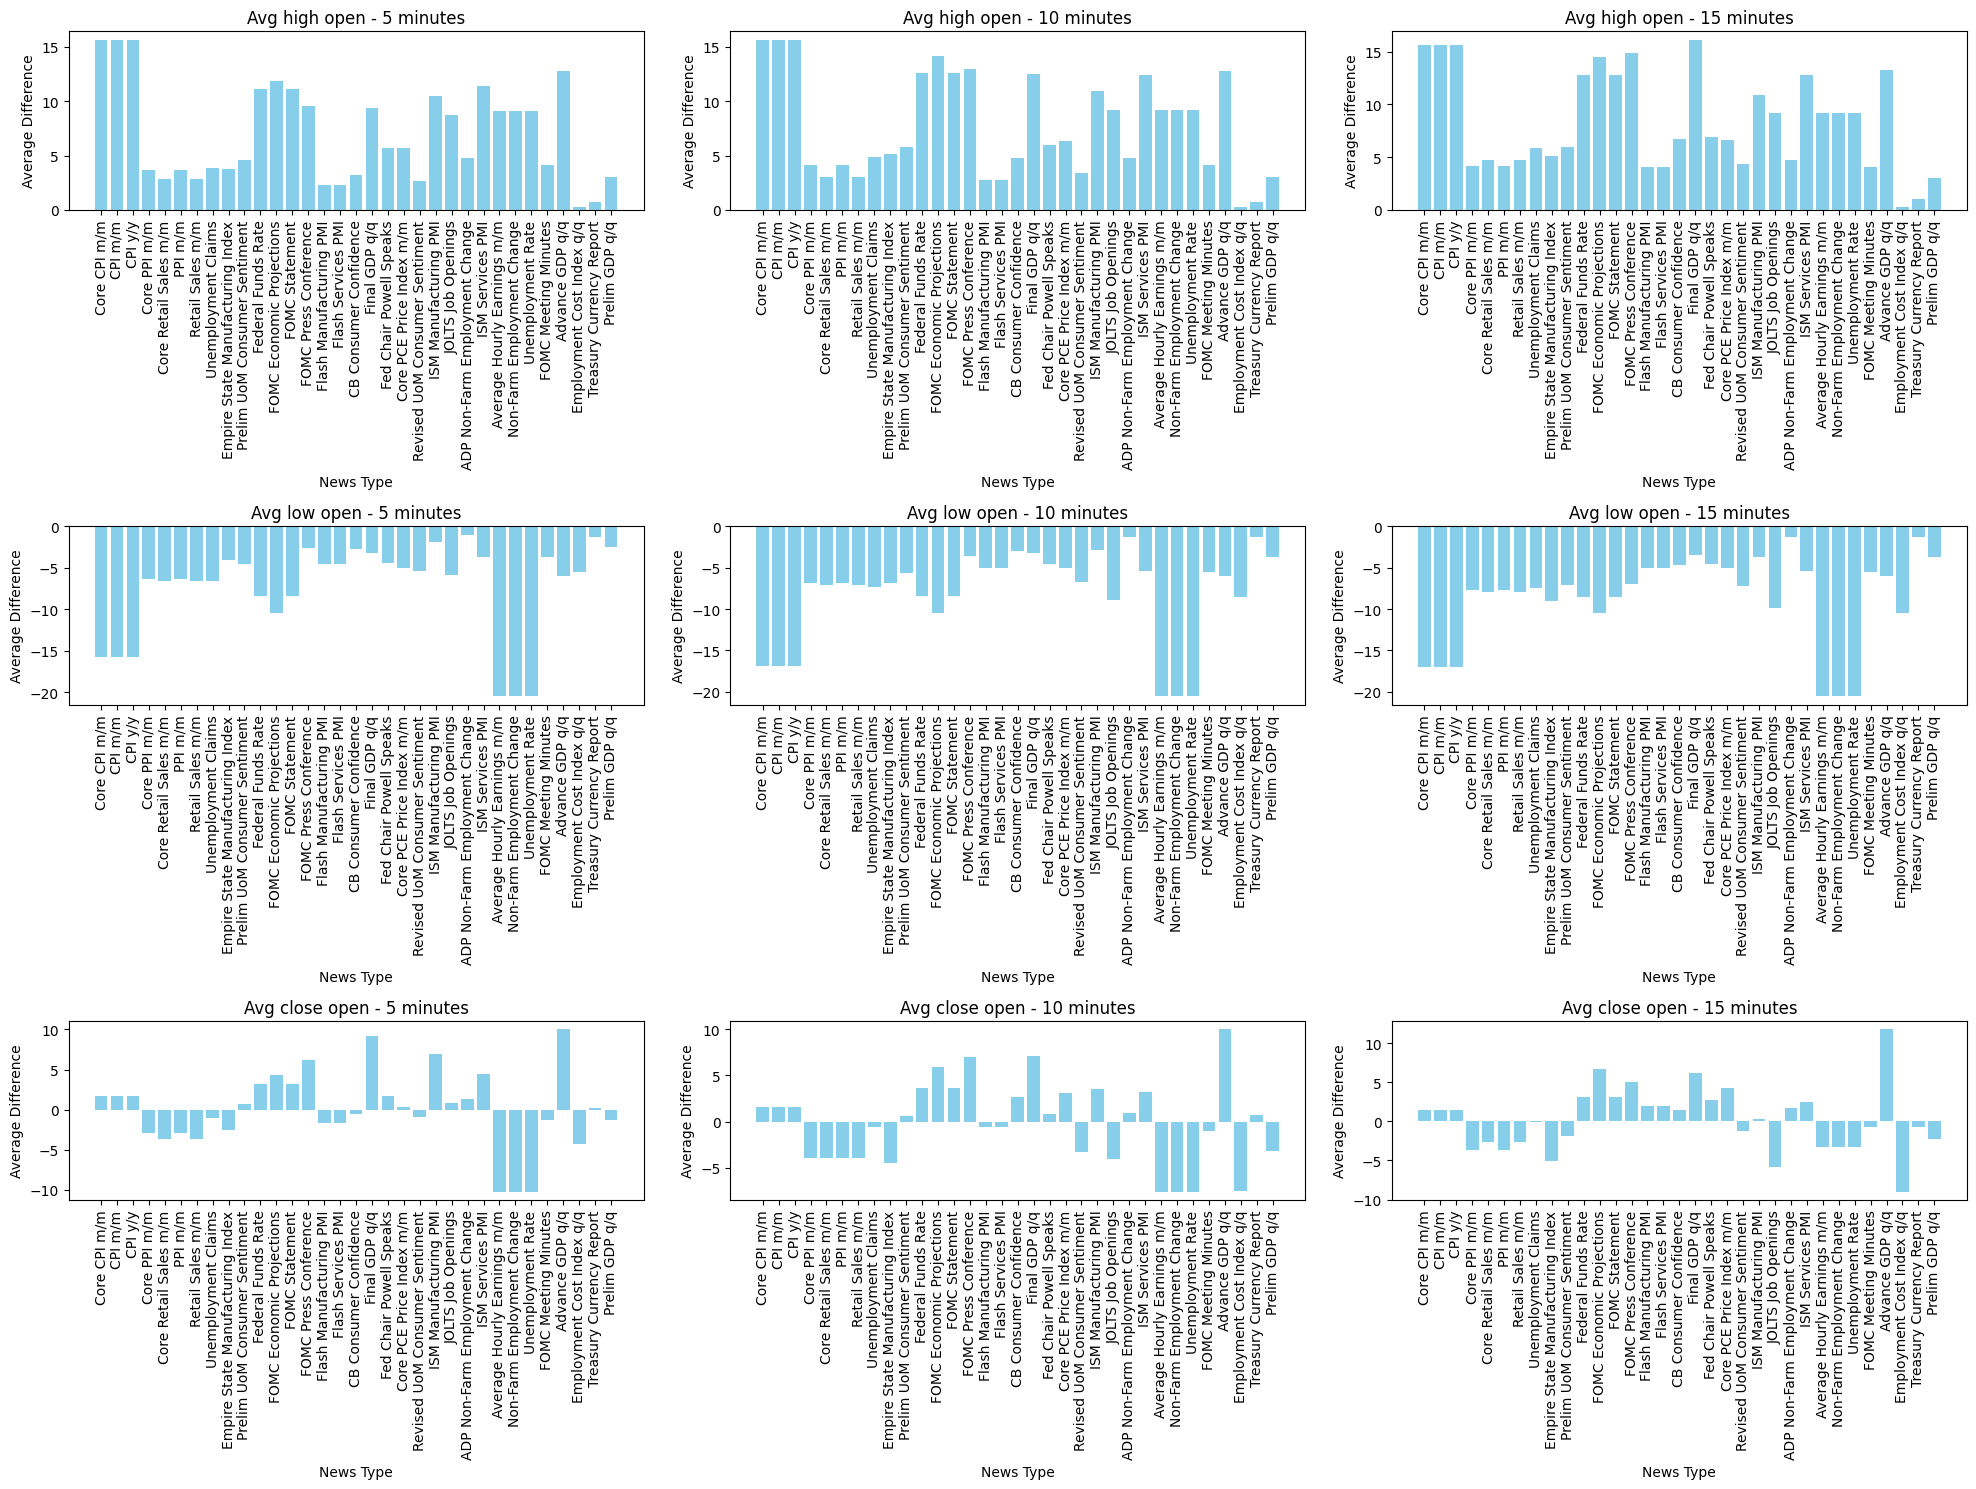

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
news2['date'] = pd.to_datetime(news2['date'])

def get_intervals_after(news_timestamp, periods):
    intervals = []
    for period in periods:
        interval_end = news_timestamp + pd.Timedelta(minutes=period)
        intervals.append((news_timestamp, interval_end))
    return intervals

average_diffs_by_type = {'5 minutes': {}, '10 minutes': {}, '15 minutes': {}}

for index, news_event in news2.iterrows():
    intervals = get_intervals_after(news_event['date'], [5, 10, 15])

    if news_event['event'] not in average_diffs_by_type['5 minutes']:
        average_diffs_by_type['5 minutes'][news_event['event']] = {'high_open': [], 'low_open': [], 'close_open': []}
    if news_event['event'] not in average_diffs_by_type['10 minutes']:
        average_diffs_by_type['10 minutes'][news_event['event']] = {'high_open': [], 'low_open': [], 'close_open': []}
    if news_event['event'] not in average_diffs_by_type['15 minutes']:
        average_diffs_by_type['15 minutes'][news_event['event']] = {'high_open': [], 'low_open': [], 'close_open': []}

    for interval_start, interval_end in intervals:
        data = df[(df['DateTime'] >= interval_start) & (df['DateTime'] < interval_end)]

        if not data.empty:
            highest_high = data['Candle_HighPrice'].max()
            lowest_low = data['Candle_LowPrice'].min()

            open_price = data.iloc[0]['Candle_OpenPrice']
            close_price = data.iloc[-1]['Candle_ClosePrice']

            high_open = highest_high - open_price
            low_open = lowest_low - open_price
            close_open = close_price - open_price

            if interval_end - interval_start == pd.Timedelta(minutes=5):
                interval_key = '5 minutes'
            elif interval_end - interval_start == pd.Timedelta(minutes=10):
                interval_key = '10 minutes'
            elif interval_end - interval_start == pd.Timedelta(minutes=15):
                interval_key = '15 minutes'

            average_diffs_by_type[interval_key][news_event['event']]['high_open'].append(high_open)
            average_diffs_by_type[interval_key][news_event['event']]['low_open'].append(low_open)
            average_diffs_by_type[interval_key][news_event['event']]['close_open'].append(close_open)

average_values_by_type = {'5 minutes': {}, '10 minutes': {}, '15 minutes': {}}

for interval_key in average_diffs_by_type:
    for news_type in average_diffs_by_type[interval_key]:
        average_values_by_type[interval_key][news_type] = {
            'avg_high_open': sum(average_diffs_by_type[interval_key][news_type]['high_open']) / len(average_diffs_by_type[interval_key][news_type]['high_open']),
            'avg_low_open': sum(average_diffs_by_type[interval_key][news_type]['low_open']) / len(average_diffs_by_type[interval_key][news_type]['low_open']),
            'avg_close_open': sum(average_diffs_by_type[interval_key][news_type]['close_open']) / len(average_diffs_by_type[interval_key][news_type]['close_open'])
        }

interval_names = ['5 minutes', '10 minutes', '15 minutes']
diff_types = ['avg_high_open', 'avg_low_open', 'avg_close_open']

fig, axes = plt.subplots(len(diff_types), len(interval_names), figsize=(20, 15))

for i, diff_type in enumerate(diff_types):
    for j, interval_key in enumerate(interval_names):
        news_types = list(average_values_by_type[interval_key].keys())
        averages = [average_values_by_type[interval_key][news_type][diff_type] for news_type in news_types]

        axes[i, j].bar(news_types, averages, color='skyblue')
        axes[i, j].set_title(f'{diff_type.replace("_", " ").capitalize()} - {interval_key}')
        axes[i, j].set_xlabel('News Type')
        axes[i, j].set_ylabel('Average Difference')
        axes[i, j].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()